In [17]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
dados = pd.read_csv('FIFA 2018 Statistics.csv')

In [29]:
dados.head(10)

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
5,15-06-2018,Iran,Morocco,1,36,8,2,5,1,2,...,3,0,0,Yes,90.0,Group Stage,No,0,NaN,NaN
6,15-06-2018,Portugal,Spain,3,39,8,3,2,3,4,...,1,0,0,No,4.0,Group Stage,No,0,NaN,NaN
7,15-06-2018,Spain,Portugal,3,61,12,5,5,2,5,...,1,0,0,Yes,24.0,Group Stage,No,0,NaN,NaN
8,16-06-2018,France,Australia,2,51,12,5,4,3,5,...,1,0,0,Yes,58.0,Group Stage,No,0,NaN,NaN
9,16-06-2018,Australia,France,1,49,4,1,2,1,1,...,3,0,0,No,62.0,Group Stage,No,0,1.0,81.0


In [4]:
dados.columns

Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')

In [5]:
dados.iloc[0]

Date                        14-06-2018
Team                            Russia
Opponent                  Saudi Arabia
Goal Scored                          5
Ball Possession %                   40
Attempts                            13
On-Target                            7
Off-Target                           3
Blocked                              3
Corners                              6
Offsides                             3
Free Kicks                          11
Saves                                0
Pass Accuracy %                     78
Passes                             306
Distance Covered (Kms)             118
Fouls Committed                     22
Yellow Card                          0
Yellow & Red                         0
Red                                  0
Man of the Match                   Yes
1st Goal                            12
Round                      Group Stage
PSO                                 No
Goals in PSO                         0
Own goals                

In [6]:
dados.iloc[1]

Date                        14-06-2018
Team                      Saudi Arabia
Opponent                        Russia
Goal Scored                          0
Ball Possession %                   60
Attempts                             6
On-Target                            0
Off-Target                           3
Blocked                              3
Corners                              2
Offsides                             1
Free Kicks                          25
Saves                                2
Pass Accuracy %                     86
Passes                             511
Distance Covered (Kms)             105
Fouls Committed                     10
Yellow Card                          0
Yellow & Red                         0
Red                                  0
Man of the Match                    No
1st Goal                           NaN
Round                      Group Stage
PSO                                 No
Goals in PSO                         0
Own goals                

In [7]:
dados.groupby('Team')['Goal Scored'].sum()

Team
Argentina          6
Australia          2
Belgium           16
Brazil             8
Colombia           6
Costa Rica         2
Croatia           14
Denmark            3
Egypt              2
England           12
France            14
Germany            2
Iceland            2
Iran               2
Japan              6
Korea Republic     3
Mexico             3
Morocco            2
Nigeria            3
Panama             2
Peru               2
Poland             2
Portugal           6
Russia            11
Saudi Arabia       2
Senegal            4
Serbia             2
Spain              7
Sweden             6
Switzerland        5
Tunisia            5
Uruguay            7
Name: Goal Scored, dtype: int64

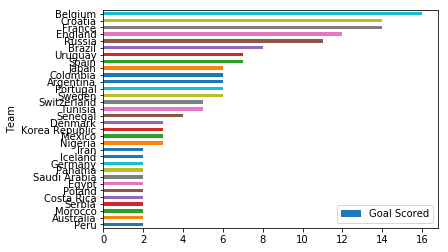

In [8]:
dados.groupby('Team')['Goal Scored'].sum()\
    .reset_index().sort_values('Goal Scored')\
    .plot.barh('Team', 'Goal Scored')

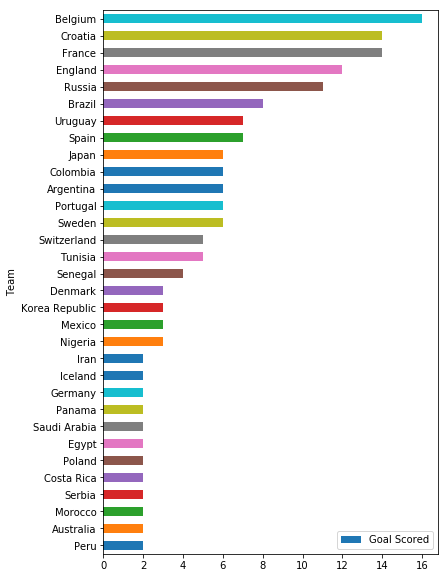

In [15]:
plot = dados.groupby('Team')['Goal Scored'].sum()\
    .reset_index().sort_values('Goal Scored')\
    .plot.barh('Team', 'Goal Scored')
fig = plot.get_figure()
fig.set_figheight(10)
fig.savefig('barh.png')

In [16]:
X = dados[
    ['Saves', 'Goal Scored', 'Attempts',
    'Pass Accuracy %']
]
Y = dados['Man of the Match']

In [18]:
x_treino, x_teste, y_treino, y_teste = \
    train_test_split(X, Y, test_size=0.3)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
random_model = RandomForestClassifier()

In [23]:
random_model.fit(x_treino, y_treino)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
random_model.score(x_teste, y_teste)

0.6410256410256411

In [32]:
y_teste.head(5)

7     Yes
80    Yes
22    Yes
16     No
25     No
Name: Man of the Match, dtype: object

In [31]:
random_model.predict(x_teste)

array(['Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes'],
      dtype=object)